# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="https://raw.githubusercontent.com/learn-co-curriculum/dsc-monty-hall-problem-lab/master/images/Image_58_MontyHall.png" alt="doors 1, 2, and 3 with two goats and a car">

## Objectives

In this lab you will:

- Use Bayes' theorem along with a simulation to solve the Monty Hall problem

## Run a simulation

This is not a traditional application of Bayes' theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool Bayesians frequently employ, running simulations. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

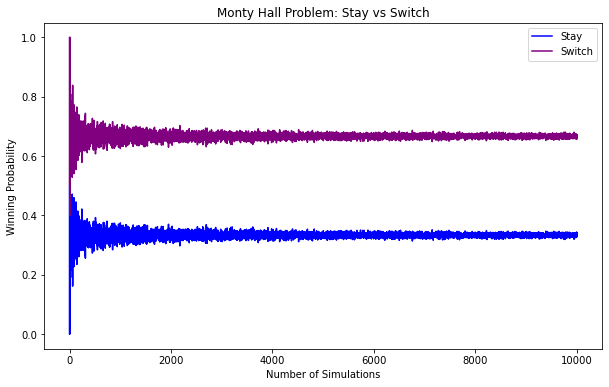

In [4]:
# Your code here
import random
import matplotlib.pyplot as plt

# Function to run the Monty Hall simulation
def monty_hall_simulation(num_trials):
    stay_wins = 0
    switch_wins = 0

    for _ in range(num_trials):
        # Randomly assign the car to one of the three doors
        car_door = random.randint(1, 3)
        
        # Player makes an initial selection
        player_choice = random.randint(1, 3)
        
        # Host reveals a goat behind one of the two remaining doors
        # So we must pick a door that is not the player's choice or the car door
        remaining_doors = [1, 2, 3]
        remaining_doors.remove(player_choice)
        if car_door in remaining_doors:
            remaining_doors.remove(car_door)
        # The host reveals a door with a goat
        host_reveal = remaining_doors[random.randint(0, len(remaining_doors) - 1)]
        
        # The contestant can switch to the remaining door
        remaining_door = [door for door in [1, 2, 3] if door != player_choice and door != host_reveal][0]
        
        # Check if staying wins
        if player_choice == car_door:
            stay_wins += 1
        
        # Check if switching wins
        if remaining_door == car_door:
            switch_wins += 1

    return stay_wins / num_trials, switch_wins / num_trials

# Simulate the Monty Hall problem for a large number of trials
num_trials = 10000
stay_probabilities = []
switch_probabilities = []

# Running the simulation and recording results
for trial in range(1, num_trials + 1):
    stay_prob, switch_prob = monty_hall_simulation(trial)
    stay_probabilities.append(stay_prob)
    switch_probabilities.append(switch_prob)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_trials + 1), stay_probabilities, label='Stay', color='blue')
plt.plot(range(1, num_trials + 1), switch_probabilities, label='Switch', color='purple')
plt.xlabel('Number of Simulations')
plt.ylabel('Winning Probability')
plt.title('Monty Hall Problem: Stay vs Switch')
plt.legend()
plt.show()

## Summary

In this lab, you further investigated the idea of Bayes' theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 